In [1]:
import os
from os.path import join

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('paper.mcstyle')

import seaborn as sns
import pandas as pd

import numpy as np

In [2]:
import ili
from ili.dataloaders import StaticNumpyLoader
from ili.validation.runner import ValidationRunner

## Load and look at data

## NPE/NLE/NRE/DELFI toy comparison

In [3]:
# Load data
cfgdir = '/home/mattho/git/ltu-ili/paper/configs/toy_model/'
wdir = '/home/mattho/git/ltu-ili/paper/wdir'
imdir = '/home/mattho/git/ltu-ili/paper/images'

os.chdir(wdir)

In [25]:
all_loader = StaticNumpyLoader.from_config(join(cfgdir, "data.yaml"))
x, theta = all_loader.get_all_data(), all_loader.get_all_parameters()

np.random.seed(123)
ind = np.random.choice(len(x))
x_obs = x[ind]
theta_obs = theta[ind]
ndim = theta.shape[1]

samples = {}
models = ['SNPE', 'SNLE', 'SNRE', 'pydelfi']
for m in models:
    samples[m] = np.load(join(wdir, 'toy', f'toy_{m}_single_samples.npy'))
# models += ['pydelfi']
# samples['pydelfi'] = np.load(join(wdir, 'toy', f'single_samples.npy'))

In [26]:
theta_obs

array([0.35044169, 0.3241884 , 0.52660582])

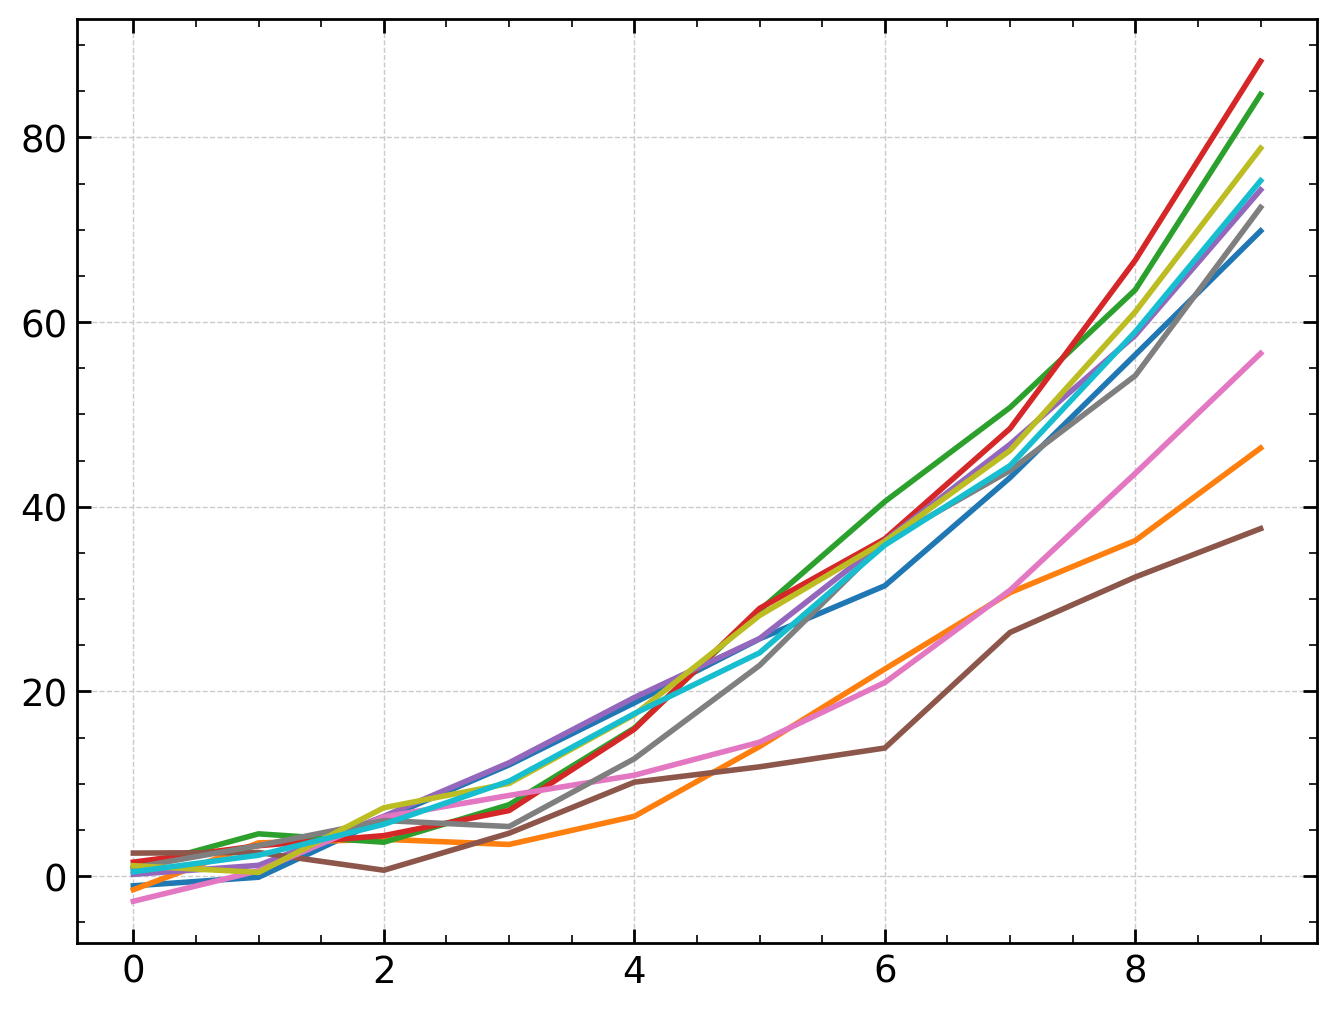

In [27]:
fig, ax = plt.subplots()
for j in np.random.choice(len(x), 10):
    ax.plot(x[j])

In [28]:
cols = [f"$\\theta_{i}$" for i in range(3)]
sampdf = [
    pd.DataFrame(samples[m], columns=cols)
    for m in models
]
modelnames = [f'sbi-{x}' for x in ['NPE', 'NLE', 'NRE']]
modelnames += [r'pydelfi-NLE']
for i in range(len(models)):
    sampdf[i]['Toy Model'] = modelnames[i]
    # sampdf[i]['weight'] = 1/len(samples[models[i]])
sampdf = pd.concat(sampdf)

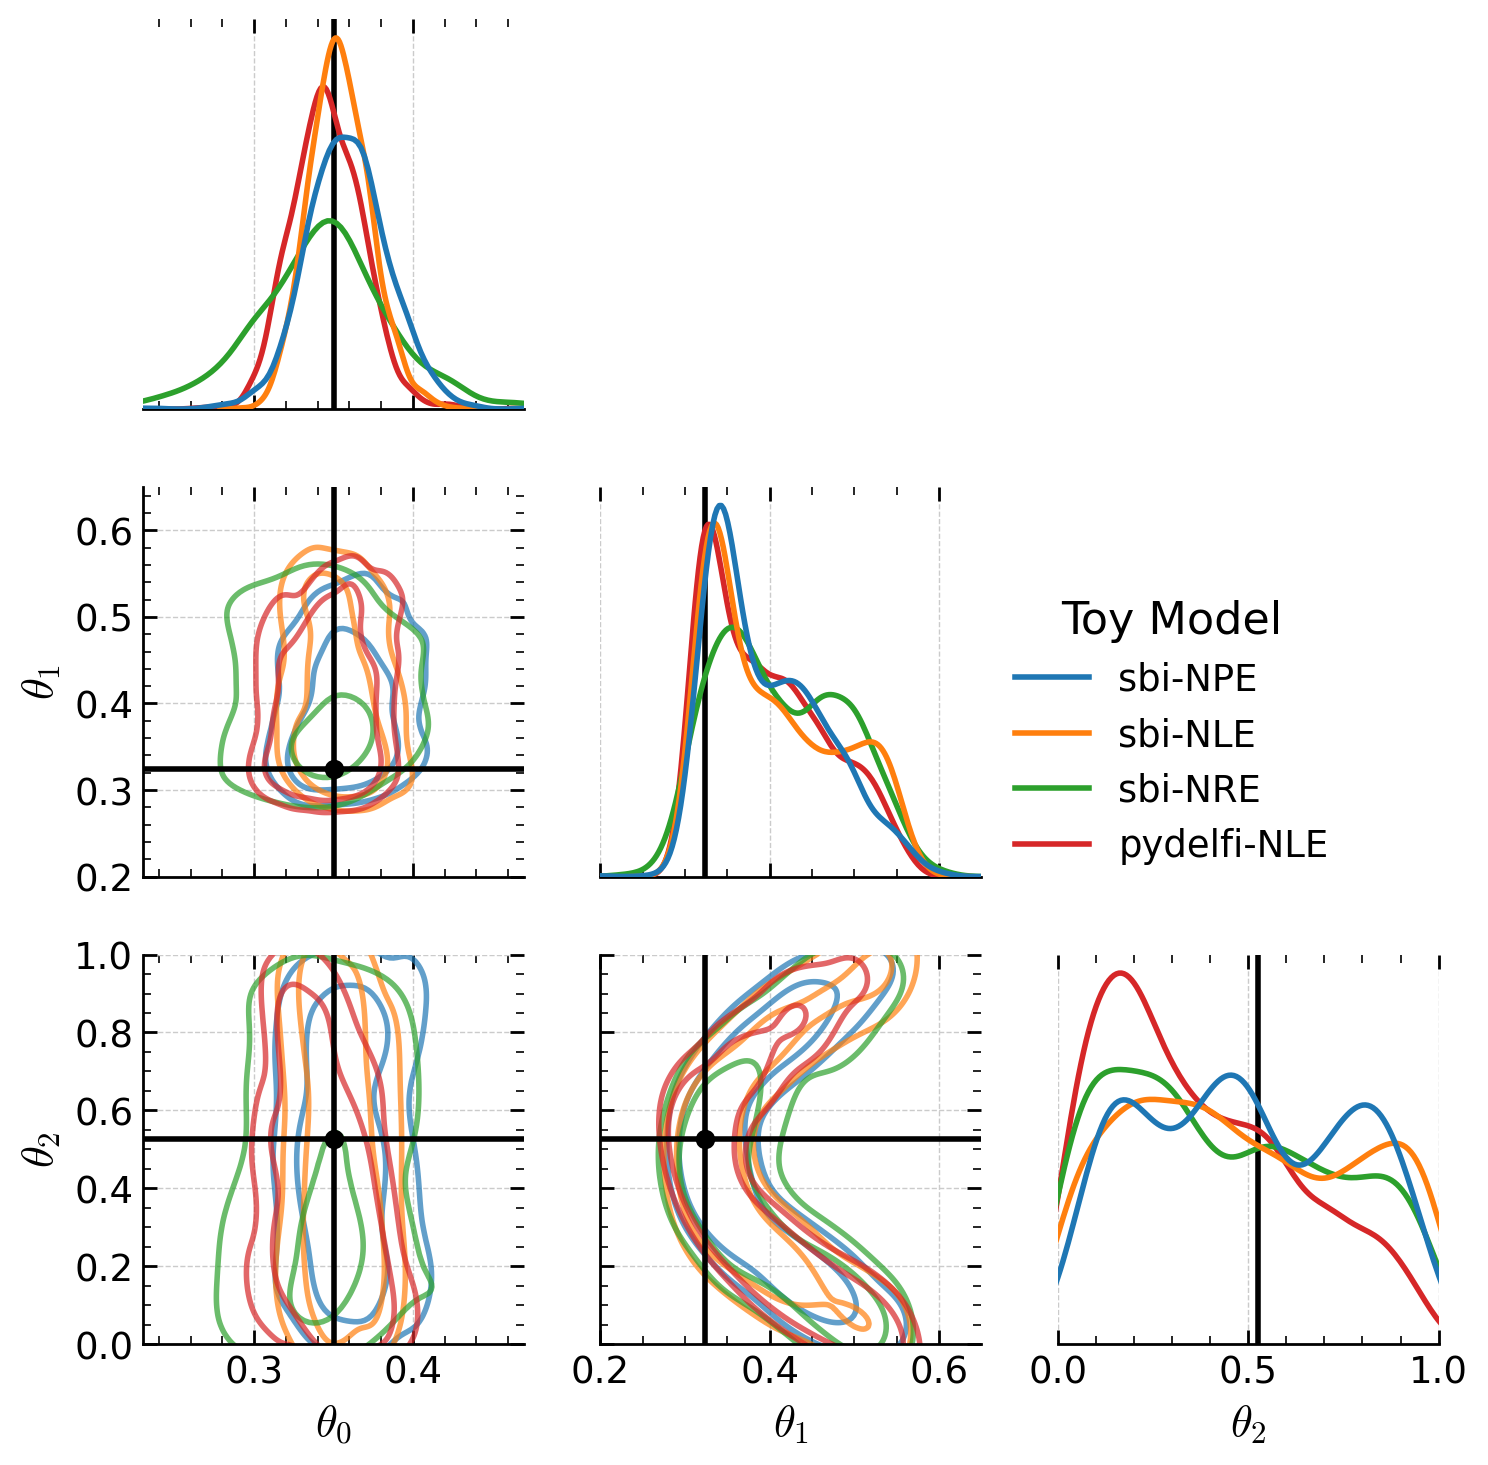

In [30]:
g = sns.pairplot(
    sampdf,
    hue='Toy Model',
    kind='kde',
    diag_kind='kde',
    plot_kws=dict(alpha=0.7, levels=[0.1, .36], fill=False),
    diag_kws=dict(linewidth=2, fill=False, common_norm=False),
    palette=None, # 'colorblind',
    corner=True,
)
# plot the true value
lims = [(0.23, 0.47), (0.2, 0.65), (0.0, 1)]
for i in range(ndim):
    for j in range(i + 1):
        if i == j:
            g.axes[i, i].axvline(theta_obs[i], lw=2, color="k")
            g.axes[i, i].set_xlim(*lims[i])
        else:
            g.axes[i, j].axhline(theta_obs[i], lw=2, color="k")
            g.axes[i, j].axvline(theta_obs[j], lw=2, color="k")
            g.axes[i, j].plot(theta_obs[j], theta_obs[i], "ko")
            g.axes[i, j].set_xlim(*lims[j])
            g.axes[i, j].set_ylim(*lims[i])
sns.move_legend(g, "right", bbox_to_anchor=(0.75, 0.5))
plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
g.savefig(join(imdir, 'corner_compare.pdf'))